In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # For Data Visualization
import numpy as np # For Numerical activities

import matplotlib.pyplot as plt # For Visualization
import seaborn as sns # For Visualization
import folium # For Map Visualization

plt.style.use('fivethirtyeight') # For Nice Viz

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
import statiscics as st

ModuleNotFoundError: No module named 'statiscics'

In [12]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## Modelo básico de como vai ser o programa que unificará todos os pontos da planilha kc_house.
# Listas hipotéticas de como ficariam as listas com as pontuações da tabela.
a1 = (2,3,4,5,6,7,8,3,4,6)
a2 = (4,6,3,2,1,6,4,6,3,4)

## Exemplo de como ficaria o programa final
# for b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19
# in zip(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18):
#     c = x + y
#     d.append(c)

# O somatório de todas listas seria depositado em uma única lista atravez de um laço for zip (como no caso do exemplo abaixo
# as somas foram depositadas na lista "d".
d = []
c = 0
for x, y in zip(a1,a2):
    c = x + y
    d.append(c)

print(f'A lista com a soma das pontuações {d}','\n')
# O programa abaixo seria o exemplo de como sincronizar todas as somas de pontos com seu respectivo ID em um único 
# dicionário
g = ["lagos", "bar", "santino", "darlos", "evaro", "garcia", "saulo", "clayton", "mohamed", "baraka"]

lista_nova = dict()
for x1, y1 in zip(g,d):
    lista_nova[x1] = y1

lista_nova = sorted(lista_nova.items(), key=lambda x: x[1], reverse = True)
print('Dicionário com as pontuações junto dos identificadores','\n',lista_nova,'\n')
print(f'As 4 pontuações mais altas são:{lista_nova[0:4]}','\n',f'As 4 pontuações mais baixas são: {lista_nova[6:10+1]}')

A lista com a soma das pontuações [6, 9, 7, 7, 7, 13, 12, 9, 7, 10] 

Dicionário com as pontuações junto dos identificadores 
 [('garcia', 13), ('saulo', 12), ('baraka', 10), ('bar', 9), ('clayton', 9), ('santino', 7), ('darlos', 7), ('evaro', 7), ('mohamed', 7), ('lagos', 6)] 

As 4 pontuações mais altas são:[('garcia', 13), ('saulo', 12), ('baraka', 10), ('bar', 9)] 
 As 4 pontuações mais baixas são: [('darlos', 7), ('evaro', 7), ('mohamed', 7), ('lagos', 6)]


In [3]:
kc2 = pd.read_csv('kc_house_data_tr.csv', sep = ',')

In [4]:
display(kc2)

,registro,data,preço,quartos,banheiros,casa_m²,lote_m²,nº_pavtos,frente_mar,visao,...,padrao,excluir_3,subsolo_m²,construção,reforma,cep,lat,log,exclur_1,excluir_2
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
kc2.describe()

,registro,preço,quartos,banheiros,casa_m²,lote_m²,nº_pavtos,frente_mar,visao,condicao,padrao,excluir_3,subsolo_m²,construção,reforma,cep,lat,log,exclur_1,excluir_2
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
quartos = kc2['quartos'].tolist()

In [19]:
# A lista "qu" está recebendo a potuação de acordo com o número de quartos'
qu = []
for x in quartos:
    if x == 1:
        qu.append(1)
    elif x == 2:
        qu.append(2)
    elif x == 3:
        qu.append(3)
    elif x == 4:
        qu.append(4)
    elif x == 5:
        qu.append(5)
    else:
        qu.append(0)
print(len(qu))

21613


In [22]:
banheiros = kc2['banheiros'].tolist()
banheiros2 = []
d = 5.21
d = round(d)
for x in banheiros:
    x = round(x)
    banheiros2.append(x)
print(len(banheiros2))

21613


Banheiro tá com muito valor quebrado. Será que a gente poderia aplicar alguma função de arredondamento? 
Só 6710 IDs tem um número de banheiros fechado. 

In [23]:
bn = []
for x in banheiros2:
    if x == 0:
        bn.append(0)
    elif x == 1:
        bn.append(1)
    elif x == 2:
        bn.append(2)
    elif x == 3:
        bn.append(3)
    elif x == 4:
        bn.append(4)
    elif x == 5:
        bn.append(5)
    elif x == 6:
        bn.append(6)
    elif x == 7:
        bn.append(7)
    elif x == 8:
        bn.append(8)
        
print(len(bn))

21613


In [20]:
condicao = kc2['condicao'].tolist()

In [21]:
cd = []
for x in condicao:
    if x == 1:
        cd.append(1)
    elif x == 2:
        cd.append(2)
    elif x == 3:
        cd.append(3)
    elif x == 4:
        cd.append(4)
    elif x == 5:
        cd.append(5)
        
print(len(cd))

21613


In [14]:
padrao = kc2['padrao'].tolist()

In [15]:
pr = []
for x in padrao:
    if x == 1:
        pr.append(1)
    elif x == 2:
        pr.append(2)
    elif x == 3:
        pr.append(3)
    elif x == 4:
        pr.append(4)
    elif x == 5:
        pr.append(5)
    elif x == 6:
        pr.append(6)
    elif x == 7:
        pr.append(7)
        
print(len(qu))

21613


In [16]:
visao = kc2['visao'].tolist()

In [17]:
vs = []
for x in visao:
    if x == 0:
        vs.append(0)
    elif x == 1:
        vs.append(1)
    elif x == 2:
        vs.append(2)
    elif x == 3:
        vs.append(3)
    elif x == 4:
        vs.append(4)
        
print(len(vs))

21613


In [18]:
frente_mar = kc2['frente_mar'].tolist()

In [19]:
fm = []
for x in frente_mar:
    if x == 0:
        fm.append(0)
    elif x == 1:
        fm.append(1)
        
print(len(fm))

21613


In [20]:
nº_pavtos = kc2['nº_pavtos'].tolist()

In [21]:
pv = []
for x in nº_pavtos:
    if x == 1:
        pv.append(0)
    elif x == 1.5:
        pv.append(1)
    elif x == 2:
        pv.append(2)
    elif x == 2.5:
        pv.append(3)
    elif x == 3:
        pv.append(4)
    elif x == 3.5:
        pv.append(5)

print(len(pv))

21613


In [22]:
ZIPs = kc2['cep'].tolist()

In [23]:
cep = []
for x in ZIPs:
    if x == 98074:
        cep.append(1)
    elif x == 98029:
        cep.append(1)
    elif x == 98052:
        cep.append(1)
    elif x == 98019:
        cep.append(1)
    elif x == 98075:
        cep.append(1)
    elif x == 98065:
        cep.append(1)
    elif x == 98038:
        cep.append(1)
    elif x == 98148:
        cep.append(-1)
    elif x == 98057:
        cep.append(-1)
    elif x == 98050:
        cep.append(-1)
    elif x == 98224:
        cep.append(-1)
    elif x == 98134:
        cep.append(-1)
    elif x == 98070:
        cep.append(-1)
    elif x == 98288:
        cep.append(-1)
    else:
        cep.append(0)

print(len(cep))
cep.count(-1)

21613


175

In [24]:
# Quanto a classificação pelo valor da casa, eu pensei se a gente não poderia deixar isso pro final. Quando selecionássemos
# as casas mais valorizáveis e as menos valorizadas. Escolhendo as 5 casas que tivessem o menor preço dentro das melhores 
# condições possíveis. E as cinco casas que tivessem o maior preço dentro das piores condições possíveis.

In [25]:
# Quanto aos aspectos envolvendo a superfície da casa, acho que poderíamos dar a maior pontuação as casas que tivessem as
# suas medidas acima do 3 quartil, menor pontuação as casas com medidas abaixo do 1 quartil, e pontuações intermediárias 
# nas medidas entre o 1 e o 3 quartil. 

In [51]:
latitude = kc2['lat'].tolist()
longitude = kc2['log'].tolist()
print(latitude[0:10])
print(longitude[0:10])

[47.5112, 47.721, 47.7379, 47.5208, 47.6168, 47.6561, 47.3097, 47.4095, 47.5123, 47.3684]
[-122.257, -122.319, -122.233, -122.393, -122.045, -122.005, -122.327, -122.315, -122.337, -122.031]


In [24]:
casa_m2 = kc2['casa_m²'].tolist()
print(casa_m2[0:10])
1427
1910
2550

[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 1890]


In [32]:
cm2 = []
for y in casa_m2:
  if y <= 1427:
    cm2.append(0)
  if 1427 < y <= 1910:
    cm2.append(1)
  if 1910 < y <= 2550:
    cm2.append(2)
  if y > 2550:
    cm2.append(4) 
    
print(len(cm2))


21613


In [33]:
lotem2 = kc2['lote_m²'].tolist()
print(lotem2[0:10])
5040, 7618, 10688

[5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7470, 6560]


In [34]:
lm2 = []
for y in casa_m2:
  if y <= 5040:
    lm2.append(0)
  if 5040 < y <= 7618:
    lm2.append(1)
  if 7618 < y <= 10688:
    lm2.append(2)
  if y > 10688:
    lm2.append(4) 
    
print(len(lm2))

21613


8487 
 13126


{'whiskers': [<matplotlib.lines.Line2D at 0x2298ebeff70>,
 'caps': [<matplotlib.lines.Line2D at 0x2298ebfd6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2298ebefbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x2298ebfddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2298ec4e1c0>],
 'means': []}

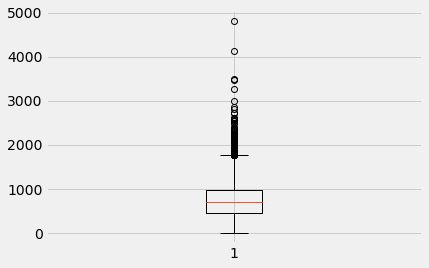

In [11]:
sbs2 = kc2['subsolo_m²'].tolist()
291, 560, 4820
sbs3 = []
sbs4 = []
for x in sbs2:
    if x != 0:
        sbs3.append(x)
    else:
        sbs4.append(x)
    
print(len(sbs3),'\n',len(sbs4))
plt.boxplot(sbs3)

In [15]:
construcao = kc2['construção'].tolist()
1951, 1975, 1997

(1951, 1975, 1997)

In [17]:
const = []
for y in construcao:
  if y <= 1951:
    const.append(0)
  if 1951 < y <= 1975:
    const.append(1)
  if 1975 < y <= 1997:
    const.append(2)
  if y > 1997:
    const.append(4) 
    
print(len(const))

21613


In [13]:
rfm = kc2['reforma'].tolist()

914


{'whiskers': [<matplotlib.lines.Line2D at 0x2298ef89df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2298ee9d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2298ef89a60>],
 'medians': [<matplotlib.lines.Line2D at 0x2298ee9dc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2298eea8040>],
 'means': []}

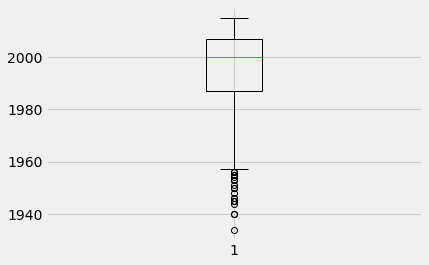

In [24]:
rfm2 = []
rfm3 = []
for x in rfm:
    if x != 0:
        rfm2.append(x)
    
    
print(len(rfm2))
plt.boxplot(rfm2)